# Pyber Ride Sharing Analysis

- Pyber in Rural areas had fewer drivers and rides, but fares tended to be higher. While there seems to be no well-defined trend in relationship to average fare, this could be due to ride distance or leaner supply of drivers in rural areas. Additional analysis of data such as "Distance Per Ride" and "Driver Fare Per Mile" would allow for better insights.

- The majority of drivers and rides are in Urban areas, but average fares tend to be less than those in Suburban and Rural areas. This may be explained by the significantly larger supply of drivers or by shorter average distances per ride in Urban areas. Additional analysis of "Distance Per Ride" and "Driver Fare Per Mile" would be beneficial to better understanding this relationship. Further analysis may also provide insight about the possibility that there is currently an oversupply of drivers in Urban areas.

- Suburban areas may be a business growth opportunity. Currently, Suburban drivers make up only 16.5 percent of Pyber's total drivers, but account for 26.3 percent of rides and 30.5 percent of total fares. Further analysis of Suburban ride demand could assist in understanding if additional drivers are needed in Suburban areas.


In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv('../Pyber/data/city_data.csv')
city_data_to_load.head()
ride_data_to_load = pd.read_csv('../Pyber/data/ride_data.csv')
ride_data_to_load.head()
# Combine the data into a single dataset
Pyber_df = pd.merge(city_data_to_load, ride_data_to_load, how="left", on=["city", "city"])
# Display the data table for preview
Pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
Pyber_df = Pyber_df.rename(columns={"city" : "City", "date" : "Date", "fare" : "Fare", "ride_id" : "Ride ID", "driver_count" : "Driver Count", "type" : "Type"
})
Pyber_df.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [23]:
#group be city name
by_city = Pyber_df.groupby('City')

# var holding total fares by city
total_fares = by_city.sum()['Fare']

# var holding avg fare by city
avg_fare = by_city.mean()['Fare']

#var holding rides by city
ride_count = by_city['Ride ID'].count()

# num of drivers
driver_count = by_city.mean()['Driver Count']

# city type data
city_type = city_data_to_load.set_index('city')['type']

# dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Total Fares": total_fares,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type})


## Bubble Plot of Ride Sharing Data

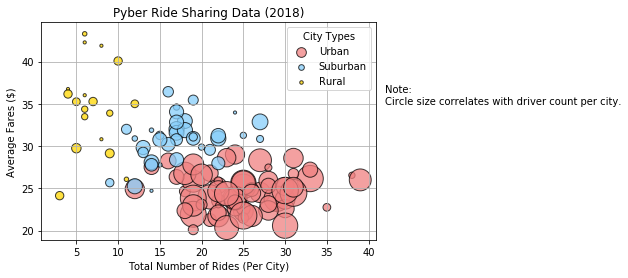

<Figure size 432x288 with 0 Axes>

In [5]:
# Obtain the x and y coordinates for each of the three city types
urban = city_info.loc[(city_info["Type of City"] == "Urban")]
suburban = city_info.loc[(city_info["Type of City"] == "Suburban")]
rural = city_info.loc[(city_info["Type of City"] == "Rural")]

avg_fare_urban = urban.groupby(['Type of City'])['Average Fare'].mean()
total_rides_urban = urban.groupby(['Type of City']).count()['Number of Rides']
total_drivers_urban = urban.groupby(['Type of City'])['Number of Drivers'].value_counts()

avg_fare_suburban = suburban.groupby(['Type of City'])['Average Fare'].mean()
total_rides_suburban = suburban.groupby(['Type of City']).count()['Number of Rides']
total_drivers_suburban = suburban.groupby(['Type of City'])['Number of Drivers'].value_counts()

avg_fare_rural = rural.groupby(['Type of City'])['Average Fare'].mean()
total_rides_rural = rural.groupby(['Type of City']).count()['Number of Rides']
total_drivers_rural = rural.groupby(['Type of City'])['Number of Drivers'].value_counts()

# num of drivers
driver_count = by_city.mean()['Driver Count']

#Color Scheme
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

# Build the scatter plots for each city types
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.grid()
plt.legend(title = "City Types", loc="upper right", markerscale=.5,)
plt.text(42, 35,"Note:\nCircle size correlates with driver count per city.")



plt.show()

# Save Figure
plt.savefig("Pyber_Data_Scatter_Plot.png")

## Total Fares by City Type

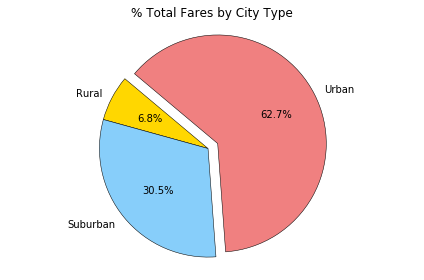

In [6]:
#group by type to be used by all pie charts
by_type = city_info.groupby('Type of City')['Type of City', 'Total Fares', 'Number of Rides', 'Number of Drivers', 'Average Fare']

# Calculate Type Percents
total_fares_by_city = city_info.groupby(['Type of City'])['Total Fares'].sum()

#labels = total_fares_by_city.index
labels = ["Rural","Suburban","Urban"]

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(total_fares_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140, wedgeprops = {'linewidth':.5,'edgecolor':'black'})
plt.title("% Total Fares by City Type")
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig("Pct_Total_Fares_City_Type.png")

## Total Rides by City Type

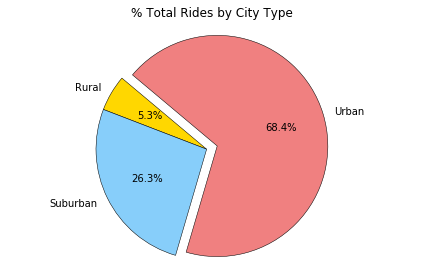

In [7]:
# Calculate Ride Percents
total_rides_by_city = city_info.groupby(['Type of City'])['Number of Rides'].sum()

#labels = total_fares_by_city.index
labels = ["Rural","Suburban","Urban"]

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(total_rides_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140, wedgeprops = {'linewidth':.5,'edgecolor':'black'})
plt.title("% Total Rides by City Type")
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig("Pct_Total_Rides_City_Type.png")

## Total Drivers by City Type

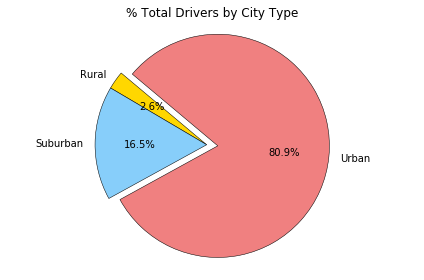

In [8]:
# Calculate Driver Percents
total_drivers_by_city = city_info.groupby(['Type of City'])['Number of Drivers'].sum()

labels = ["Rural","Suburban","Urban"]

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .1]
plt.pie(total_drivers_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=140, wedgeprops = {'linewidth':.5,'edgecolor':'black'})
plt.title("% Total Drivers by City Type")
plt.axis('equal')
plt.tight_layout()

# Save Figure
plt.savefig("Pct_Total_Drivers_City_Type.png")